In [2]:
import pandas as pd
from google.colab import drive
import numpy as np
import sklearn

drive = drive.mount('/content/drive/')

Mounted at /content/drive/


##Primeiros comandos
Acesso aos dados da planinha Everymind

---

*   Limpeza e remoção de algumas colunas que não vão ser necessárias na amplitude do nosso modelo
*   Troca dos valores nulo para zero e sua ordenação
*   Definição das variáveis "base", como a tabela Everymind da spreadsheet, e "reconhecimento", como a tabela Reconhecimento.

In [3]:
base = pd.read_excel("/content/drive/Shareddrives/grupo5_modulo3/Everymind | Grupo 5.xlsx", "Everymind")
reconhecimento = pd.read_excel("/content/drive/Shareddrives/grupo5_modulo3/Everymind | Grupo 5.xlsx", "Reconhecimento")

base[base["Tipo Saida"].notna().sort_values()]
base = base.drop(['Nome Completo'], axis=1)
base = base.drop(['Etnia'], axis=1)

base.columns

/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


Index(['Matricula', 'Dt Admissao', 'Dt Saida', 'Tipo Saida', 'Cargo',
       'Salario Mês', 'Dt Nascimento', 'Genero', 'Estado Civil',
       'Escolaridade ', 'Estado', 'Cidade', 'Area', 'Idade'],
      dtype='object')

##Este código cria 4 novas colunas na tabela Everymind.


---


- Essas tabelas se referem ao hot encoding no qual será inserido o tempo (intervalos de 3, 6, 9 e 12 meses) para promoção ou reconhecimento dentro da empresa.

In [4]:
base['3 Meses >'] = 0
base['6 Meses >'] = 0
base['9 Meses >'] = 0
base['12 Meses >'] = 0

base.columns

Index(['Matricula', 'Dt Admissao', 'Dt Saida', 'Tipo Saida', 'Cargo',
       'Salario Mês', 'Dt Nascimento', 'Genero', 'Estado Civil',
       'Escolaridade ', 'Estado', 'Cidade', 'Area', 'Idade', '3 Meses >',
       '6 Meses >', '9 Meses >', '12 Meses >'],
      dtype='object')

In [5]:
# base = base[['Matricula', 'Dt Admissao', 'Dt Saida', 'Tempo de casa', 'Tipo Saida', 'Cargo', 'Salario Mês', 'Dt Nascimento', 'Genero', 'Estado Civil', 'Escolaridade ', 'Estado', 'Cidade', 'Area', 'Idade', '3 Meses >', '6 Meses >', '9 Meses >', '12 Meses >']]

##Função que verifica, cria novas colunas e ás preenche


---


Tinhamos um grande problema em relação a tabela de reconhecimento e a tabela everymind, então criamos esse script para solucionar. O script pega cada matricula da tabela everymind e verifica se existe promoção ou merito na tabela "Reconhecimento", ele cria 4 colunas de tempo na tabela Everymind e vai preenchendo com base nos meritos e promoções da tabela de Reconhecimento.

In [6]:
from xlrd.book import display_cell_address
from datetime import date
import numpy as np
import math 

for item in base['Matricula']:
  for i in reconhecimento['Matricula']:
    if i == item:
      da = reconhecimento.iloc[int(i-1):int(i),3] #este código esta buscando um dado na tabela Reconhecimento
      date = reconhecimento.iloc[int(i-1):int(i),4]
      data3 = date - da
      data3 = data3.to_string()[3:-4].strip() #Transforma nossa data em string

      if data3 != 'ies([' and data3 != '':#Retira valores nulos ou ruídosos
        data3 = int(data3) #Transforma nossa data em um número inteiro. Ex: 200
      else: 
        data3 = 0
      mot = reconhecimento.iloc[int(i-1):int(i),7]
      motivo = mot.to_string(index=False)
      PROMOÇÃO = 2
      MÉRITO = 1
      if (data3 >= 90) and (int(data3) < 180):# os códigos abaixo estão preenchendo as novas colunas criadas com base na planilha Reconhecimento
          if (motivo == 'PROMOÇÃO'):
            base.iat[int(item),14] = 2
          elif (motivo == 'MÉRITO'):
            base.iat[int(item),14] = 1
          else:
            base.iat[int(item),14] = 0
      if (data3 > 180) and (int(data3) <= 273):
          if (motivo == 'PROMOÇÃO'):
            base.iat[int(item),15] = 2
          elif (motivo == 'MÉRITO'):
            base.iat[int(item),15] = 1
          else:
            base.iat[int(item),15] = 0
      if (data3 > 273) and (int(data3) <= 365):
          if (motivo == 'PROMOÇÃO'):
            base.iat[int(item),16] = 2
          elif (motivo == 'MÉRITO'):
            base.iat[int(item),16] = 1
          else:
            base.iat[int(item),16] = 0
      if (data3 > 365):
          if (motivo == 'PROMOÇÃO'):
            base.iat[int(item),17] = 2
          elif (motivo == 'MÉRITO'):
            base.iat[int(item),17] = 1
          else:
            base.iat[int(item),17] = 0


## Definição de Novas Tabelas

---

Criação da tabela Tempo de casa, que marca em dias quanto tempo a pessoa teve de empresa - para aquelas que têm data de saída, caso não, 0.

In [7]:
import datetime

# base['Dt Saida'] = base['Dt Saida'].fillna('-')
base['Dt Admissao'] = pd.to_datetime(base['Dt Admissao'])

houseTime = []
colaboratorStatus = []

for ind in base.index:
  if base['Dt Saida'][ind]:
    houseTime.append((base['Dt Saida'][ind] - base['Dt Admissao'][ind]).days)
  else:
    houseTime.append(0)

  # if base['Dt Saida'][ind]:
  #   print('n1')
  # else:
  #   print('n2')

for i in base.index:
  if pd.isnull(base['Dt Saida'][i]):
    colaboratorStatus.append(1) # Saiu
  else:
    colaboratorStatus.append(0) # Nao saiu

base['Tempo de casa'] = houseTime
base['Situacao'] = colaboratorStatus

base[base['Dt Saida'].notna()].sort_values('Tempo de casa', ascending=False)
base

,Matricula,Dt Admissao,Dt Saida,Tipo Saida,Cargo,Salario Mês,Dt Nascimento,Genero,Estado Civil,Escolaridade,Estado,Cidade,Area,Idade,3 Meses >,6 Meses >,9 Meses >,12 Meses >,Tempo de casa,Situacao
0,2.0,2015-02-02,NaT,NaN,Gerente Sr,9914.4,1992-01-25,Masculino,Solteiro,Graduação,SP,São Paulo,CPG & Retail,30,0,0,0,0,NaN,1
1,3.0,2015-03-26,NaT,NaN,Gerente Sr,8250.0,1991-08-03,Masculino,Solteiro,Graduação,SP,Osasco,CPG & Retail,31,0,0,0,0,NaN,1
2,4.0,2015-04-05,NaT,NaN,Arquiteto Sr,9914.4,1988-03-05,Masculino,Solteiro,Graduação,SP,São Paulo,Education,34,0,0,0,1,NaN,1
3,7.0,2015-09-01,2021-10-29,Pedido de Demissão,Arquiteto,7000.0,1986-08-31,Masculino,Solteiro,Graduação,SP,São Paulo,Core & Industrias,36,0,0,0,1,2250.0,0
4,8.0,2015-12-07,2020-05-29,Pedido de Demissão,Dev Pl,2750.0,1994-06-27,Masculino,Solteiro,Graduação,SP,São Paulo,CPG & Retail,28,0,0,0,2,1635.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,526.0,2022-07-18,2022-07-25,Rescisao Contrato Exp - Pedido,Dev Jr,1500.0,1993-07-15,Feminino,Solteiro,Pós Graduação,PR,Colombo,Integration,29,0,0,0,0,7.0,0
471,527.0,2022-07-18,NaT,NaN,Arquiteto,7000.0,1981-08-16,Masculino,Casado,Superior incompleto,SP,Guarulhos,Mkt Cloud,41,0,0,0,0,NaN,1
472,528.0,2022-07-18,NaT,NaN,Dev Jr,1750.0,1991-12-05,Masculino,Solteiro,Pós Graduação,DF,Brasília,Integration,30,0,0,0,0,NaN,1
473,529.0,2022-07-18,NaT,NaN,Dev Pl,2750.0,1990-01-18,Masculino,Solteiro,Superior incompleto,MG,Unaí,Commerce,32,0,0,0,0,NaN,1


In [8]:
base.replace('(^\s+|\s+$)', '', regex=True, inplace=True)

In [9]:
set(base["Escolaridade "].values)

{'Ensino Médio',
 'Ensino Médio Incompleto',
 'Graduação',
 'Mestrado',
 'Pós Graduação',
 'Superior incompleto',
 'Técnico'}

## Hot / Label Encoding 
---

Atribuição de variáveis binárias, em colunas ('Tipo Saida', 'Cargo', 'Genero', 'Estado', 'Estado Civil', 'Escolaridade ') que estavam anteriormente em formato de string. 

Nossa intenção é segmentar e podem alimentar a inteligência com o melhor estado possível após o tratamento de dados, principalmente em atributos importantes para o andamento do projeto

### Legendas

##### Tipo de Saída
- 0: Dispensa sem justa causa
- 1: Pedido de demissão
- 2: Recisão contrato - Exp/Dispensa (Saiu em menos de 3 meses por opção da empresa)
- 3: Recisão contrato - Exp/Pedido (Saiu em menos de 3 meses por pedido)
- 4: Não saiu

##### Escolaridade
- 0: Ensino médio
- 1: Ensino médio incompleto
- 2: Graduação
- 3: Mestrado
- 4: Pós graduação
- 5: Superior incompleto
- 6: Técnico

#### Estado civil
- 0: Casado
- 1: Divorciado
- 2: Separado
- 3: Solteiro
- 4: União estável

#### Genero
- 0: Masculino
- 1: Feminino

In [10]:
from sklearn import preprocessing

pd.get_dummies(base, columns=['Cargo', 'Genero', 'Estado'])

label = preprocessing.LabelEncoder()

base['Tipo Saida']= label.fit_transform(base['Tipo Saida'])
base['Escolaridade ']= label.fit_transform(base['Escolaridade '])
base['Estado Civil']= label.fit_transform(base['Estado Civil'])
base['Genero'] = label.fit_transform(base['Genero'])

In [11]:
set(base['Area'].values)

{'AMS',
 'Agencia Digital',
 'Analytics',
 'BAC',
 'BPM',
 'Best Minds',
 'CPG & Retail',
 'Commerce',
 'Core & Industrias',
 'Diretoria',
 'Education',
 'Financeiro',
 'Infraestrutura',
 'Integration',
 'Mkt Cloud',
 'PS',
 'People',
 'Produtos',
 'Vendas'}

In [12]:
base

,Matricula,Dt Admissao,Dt Saida,Tipo Saida,Cargo,Salario Mês,Dt Nascimento,Genero,Estado Civil,Escolaridade,Estado,Cidade,Area,Idade,3 Meses >,6 Meses >,9 Meses >,12 Meses >,Tempo de casa,Situacao
0,2.0,2015-02-02,NaT,4,Gerente Sr,9914.4,1992-01-25,1,3,2,SP,São Paulo,CPG & Retail,30,0,0,0,0,NaN,1
1,3.0,2015-03-26,NaT,4,Gerente Sr,8250.0,1991-08-03,1,3,2,SP,Osasco,CPG & Retail,31,0,0,0,0,NaN,1
2,4.0,2015-04-05,NaT,4,Arquiteto Sr,9914.4,1988-03-05,1,3,2,SP,São Paulo,Education,34,0,0,0,1,NaN,1
3,7.0,2015-09-01,2021-10-29,1,Arquiteto,7000.0,1986-08-31,1,3,2,SP,São Paulo,Core & Industrias,36,0,0,0,1,2250.0,0
4,8.0,2015-12-07,2020-05-29,1,Dev Pl,2750.0,1994-06-27,1,3,2,SP,São Paulo,CPG & Retail,28,0,0,0,2,1635.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,526.0,2022-07-18,2022-07-25,3,Dev Jr,1500.0,1993-07-15,0,3,4,PR,Colombo,Integration,29,0,0,0,0,7.0,0
471,527.0,2022-07-18,NaT,4,Arquiteto,7000.0,1981-08-16,1,0,5,SP,Guarulhos,Mkt Cloud,41,0,0,0,0,NaN,1
472,528.0,2022-07-18,NaT,4,Dev Jr,1750.0,1991-12-05,1,3,4,DF,Brasília,Integration,30,0,0,0,0,NaN,1
473,529.0,2022-07-18,NaT,4,Dev Pl,2750.0,1990-01-18,1,3,5,MG,Unaí,Commerce,32,0,0,0,0,NaN,1


In [13]:
base_inativo = base[base['Tipo Saida'] != 4]

base_pedido = base.drop(base[(base['Tipo Saida'] == 0) & (base['Tipo Saida'] == 2) & (base['Tipo Saida'] == 4)].index)

In [14]:
base_pedido

,Matricula,Dt Admissao,Dt Saida,Tipo Saida,Cargo,Salario Mês,Dt Nascimento,Genero,Estado Civil,Escolaridade,Estado,Cidade,Area,Idade,3 Meses >,6 Meses >,9 Meses >,12 Meses >,Tempo de casa,Situacao
0,2.0,2015-02-02,NaT,4,Gerente Sr,9914.4,1992-01-25,1,3,2,SP,São Paulo,CPG & Retail,30,0,0,0,0,NaN,1
1,3.0,2015-03-26,NaT,4,Gerente Sr,8250.0,1991-08-03,1,3,2,SP,Osasco,CPG & Retail,31,0,0,0,0,NaN,1
2,4.0,2015-04-05,NaT,4,Arquiteto Sr,9914.4,1988-03-05,1,3,2,SP,São Paulo,Education,34,0,0,0,1,NaN,1
3,7.0,2015-09-01,2021-10-29,1,Arquiteto,7000.0,1986-08-31,1,3,2,SP,São Paulo,Core & Industrias,36,0,0,0,1,2250.0,0
4,8.0,2015-12-07,2020-05-29,1,Dev Pl,2750.0,1994-06-27,1,3,2,SP,São Paulo,CPG & Retail,28,0,0,0,2,1635.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,526.0,2022-07-18,2022-07-25,3,Dev Jr,1500.0,1993-07-15,0,3,4,PR,Colombo,Integration,29,0,0,0,0,7.0,0
471,527.0,2022-07-18,NaT,4,Arquiteto,7000.0,1981-08-16,1,0,5,SP,Guarulhos,Mkt Cloud,41,0,0,0,0,NaN,1
472,528.0,2022-07-18,NaT,4,Dev Jr,1750.0,1991-12-05,1,3,4,DF,Brasília,Integration,30,0,0,0,0,NaN,1
473,529.0,2022-07-18,NaT,4,Dev Pl,2750.0,1990-01-18,1,3,5,MG,Unaí,Commerce,32,0,0,0,0,NaN,1


## Tempo de casa (Apenas dos que possuem data de saida)

---

Delimitação de alguns cálculos na coluna 'Tempo de Casa' que podem ser reaproveitados no futuro

In [15]:
base[base['Tempo de casa'] > 0].describe()

,Matricula,Tipo Saida,Salario Mês,Genero,Estado Civil,Escolaridade,Idade,3 Meses >,6 Meses >,9 Meses >,12 Meses >,Tempo de casa,Situacao
count,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.0
mean,194.120419,1.130890,3214.681728,0.816754,2.267016,2.643979,31.219895,0.036649,0.068063,0.089005,0.492147,449.078534,0.0
std,113.673406,0.851401,1733.183590,0.387885,1.271928,1.204794,7.682778,0.237791,0.325376,0.393947,0.759980,552.737131,0.0
min,7.000000,0.000000,837.785000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0
25%,108.500000,1.000000,1941.295000,1.000000,1.500000,2.000000,25.000000,0.000000,0.000000,0.000000,0.000000,149.500000,0.0
50%,180.000000,1.000000,3000.000000,1.000000,3.000000,2.000000,30.000000,0.000000,0.000000,0.000000,0.000000,261.000000,0.0
75%,265.000000,1.000000,4175.000000,1.000000,3.000000,3.000000,36.000000,0.000000,0.000000,0.000000,1.000000,496.500000,0.0
max,526.000000,3.000000,8500.000000,1.000000,4.000000,6.000000,61.000000,2.000000,2.000000,2.000000,2.000000,4594.000000,0.0


## Agrupamento de Dados por Data de Saída e Tipo de Saída(' Dt Saida ' e ' Tipo Saida ')
---

Somatórias dos dados em cada colunas por Data de Saída, em com o Tipo de Saída referenciado

In [16]:
base.groupby(['Dt Saida', 'Tipo Saida']).sum()

,,Matricula,Salario Mês,Genero,Estado Civil,Escolaridade,Idade,3 Meses >,6 Meses >,9 Meses >,12 Meses >,Tempo de casa,Situacao
Dt Saida,Tipo Saida,,,,,,,,,,,,
2020-01-07,1,95.0,3750.000,1,3,2,37,0,0,0,0,141.0,0
2020-01-17,1,75.0,837.785,1,0,4,51,0,0,0,0,304.0,0
2020-01-22,1,23.0,3228.455,1,3,2,30,0,0,0,0,863.0,0
2020-02-12,0,102.0,1200.000,1,3,2,24,0,0,0,0,155.0,0
2020-02-21,1,140.0,5858.615,2,6,4,57,0,0,0,2,855.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-15,1,979.0,8826.975,3,9,12,79,0,0,0,0,813.0,0
2022-07-18,1,324.0,1525.400,0,3,2,37,0,2,0,0,257.0,0
2022-07-22,0,342.0,7118.535,1,0,2,42,0,0,0,0,248.0,0


# Gráficos

In [17]:
import plotly.express as px
import matplotlib.pyplot as plt

df = base
fig = px.scatter(df, x="Tipo Saida", y="Cidade", color="Estado",
                 hover_data=['Cargo'])
fig.show()

In [18]:
fig1 = px.scatter(base,x='Tempo de casa',y='Cargo', color='Area', hover_data = ['Tipo Saida'])
fig1.show()

In [19]:
fig2 = px.scatter(base, x='Area',y='Tipo Saida', color='Tempo de casa')
fig2.show()

#Histogramas
---
Foi feito um tratamento com o df base para coletar apenas as colunas com dados numéricos e posteriormente fazer um histograma com cada coluna.


In [20]:
baseHist = base_inativo
baseHist = baseHist.drop(['Dt Admissao','Dt Saida', 'Cargo', 'Genero', 'Estado', 'Cidade', 'Area', 'Dt Nascimento', '3 Meses >', '6 Meses >', '9 Meses >', '12 Meses >'], axis=1)
baseHist.fillna(0,inplace = True)
def mostra_hist(coluna):
  hist = px.histogram(baseHist,x=coluna)
  hist.show()
for columns in baseHist:
  mostra_hist(columns)

### Relação Proporcional de TurnOver por Gênero
Relaciona os pedidos de demissão de cada gênero e compara-os com os ativos 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



102
23
207
77


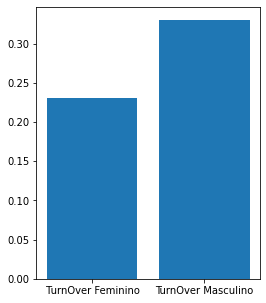

In [21]:
# Código da relação turnover por gênero
DF1 = pd.read_excel("/content/drive/Shareddrives/grupo5_modulo3/Everymind | Grupo 5.xlsx", "Everymind1")
DF1.columns = [c.replace(' ', '_') for c in DF1.columns]

# Procura o gênero dos colaboradores que pediram demissão da empresa, representados por "Pedido de Demissão" na coluna "Tipo_Saida"
DF1_FIRED = DF1.loc[DF1["Tipo_Saida"] == "Pedido de Demissão"]
# Retira os espaços dos gêneros
DF1_FIRED["Genero"] = DF1_FIRED["Genero"].str.strip()

DF1["Tipo_Saida"].fillna(0, inplace=True)
# Procura o gênero dos colaboradores que ainda estão ativos na empresa, representados por "0" na coluna "Tipo_Saida"
DF1_ACTIVE = DF1.loc[DF1["Tipo_Saida"] == 0]
# Retira os espaços dos gêneros
DF1_ACTIVE["Genero"] = DF1_ACTIVE["Genero"].str.strip()


# Converte a coluna "Genero" em uma lista e faz contagem de cada um que pediu demissão
DF1_FIRED_GENDER = DF1_FIRED['Genero'].to_numpy()
MascFired = 0
FemFired = 0
for i in DF1_FIRED_GENDER:
  if i == "Masculino":
    MascFired += 1
  if i == "Feminino":
    FemFired += 1
print(MascFired)
print(FemFired)


# Converte a coluna "Genero" em uma lista e faz contagem de cada um que ainda está na ativa
DF1_ACTIVE_GENDER = DF1_ACTIVE['Genero'].to_numpy()
MascActive = 0
FemActive = 0
for i in DF1_ACTIVE_GENDER:
  if i == "Masculino":
    MascActive += 1
  if i == "Feminino":
    FemActive += 1
print(MascActive)
print(FemActive)


# Faz a relação entre os homens que pediram demissão com o total
MascRel = MascFired/(MascFired+MascActive)
MascRel

# Faz a relação entre as mulheres que pediram demissão com o total
FemRel = FemFired/(FemFired+FemActive)
FemRel


import matplotlib.pyplot as plt
names = [" TurnOver Feminino", "TurnOver Masculino"]
values = [FemRel, MascRel]
plt.figure(figsize=(4,5))
plt.bar(names, values)
plt.show()

###Relação proporcional de tipo de saída e cargo
Relação entre os pedidos de demissão e seus respectivos cargos.


In [22]:
DF1 = pd.read_excel("/content/drive/Shareddrives/grupo5_modulo3/Everymind | Grupo 5.xlsx", "Everymind1")
DF1.columns = [c.replace(' ', '_') for c in DF1.columns]
DF1_FIRED = DF1.loc[DF1["Tipo_Saida"] == "Pedido de Demissão"]
DF1_FIRED

,Matricula,Nome_Completo,Dt_Admissao,Dt_Saida,Tipo_Saida,Cargo,Salario_Mês,Dt_Nascimento,Genero,Etnia,Estado_Civil,Escolaridade_,Estado,Cidade,Area,Idade,Tempo_de_casa,Unnamed:_17,Unnamed:_18,Unnamed:_19
3,7.0,Pessoa Colaboradora 291,2015-09-01 00:00:00,2021-10-29 00:00:00,Pedido de Demissão,Arquiteto,7000.000,1986-08-31 00:00:00,Masculino,Parda,Solteiro,Graduação,SP,São Paulo,Core & Industrias,36.0,2250,NaN,NaN,NaN
4,8.0,Pessoa Colaboradora 412,2015-12-07 00:00:00,2020-05-29 00:00:00,Pedido de Demissão,Dev Pl,2750.000,1994-06-27 00:00:00,Masculino,Parda,Solteiro,Graduação,SP,São Paulo,CPG & Retail,28.0,1635,NaN,NaN,NaN
5,9.0,Pessoa Colaboradora 425,2015-12-07 00:00:00,2021-11-12 00:00:00,Pedido de Demissão,Arquiteto,6500.000,1988-07-07 00:00:00,Masculino,Parda,Solteiro,Graduação,SP,São Paulo,Core & Industrias,34.0,2167,NaN,NaN,NaN
6,13.0,Pessoa Colaboradora 417,2016-12-05 00:00:00,2021-06-11 00:00:00,Pedido de Demissão,Arquiteto,5000.000,1992-08-05 00:00:00,Masculino,Parda,Solteiro,Graduação,SP,São Paulo,Core & Industrias,30.0,1649,NaN,NaN,NaN
7,14.0,Pessoa Colaboradora 393,2016-12-05 00:00:00,2020-10-30 00:00:00,Pedido de Demissão,Dev Pl,2068.600,1996-11-17 00:00:00,Masculino,Parda,Solteiro,Graduação,SP,Guarulhos,CPG & Retail,25.0,1425,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,336.0,Pessoa Colaboradora 350,2021-11-08 00:00:00,2022-02-09 00:00:00,Pedido de Demissão,Dev Especialista,6101.600,1980-12-13 00:00:00,Masculino,Não Informada,Solteiro,Graduação,SC,Florianópolis,CPG & Retail,41.0,295,NaN,NaN,NaN
287,341.0,Pessoa Colaboradora 319,2021-11-16 00:00:00,2022-07-08 00:00:00,Pedido de Demissão,Gerente,5593.135,1979-09-02 00:00:00,Masculino,Não Informada,Casado,Graduação,SP,Barueri,AMS,43.0,287,NaN,NaN,NaN
292,346.0,Pessoa Colaboradora 329,2021-12-01 00:00:00,2022-04-01 00:00:00,Pedido de Demissão,Gerente,6302.915,1979-09-18 00:00:00,Masculino,Não Informada,Casado,Graduação,SP,São Paulo,Analytics,42.0,121,NaN,NaN,NaN
298,352.0,Pessoa Colaboradora 338,2021-12-08 00:00:00,2022-07-01 00:00:00,Pedido de Demissão,Dev Jr,2269.050,1998-08-22 00:00:00,Masculino,Não Informada,Solteiro,Superior incompleto,RJ,Rio de Janeiro,Analytics,24.0,205,NaN,NaN,NaN


## Teste

## Graphs


In [23]:
# import matplotlib.pyplot as plt
# names = [
#   'RelAssisI',
#   'RelTesteJr',
#   'RelMarketingPL',
#   'RelEducPL',
#   'RelComercialPL',
#   'RelFinanJr',
#   'RelArqSr',
#   'RelTraineefunc',
#   'RelPessoasPL',
#   'RelGERENTEVENDASIII',
#   'RelLimpeza',
#   'RelGerenteCS',
#   'RelVicePres',
#   'RelGerVendII', 
#   'RelComercialIS',
#   'RelTesteSr',
#   'RelFuncESP',
#   'RelGerVenI',
#   'RelAssistenteII',
#   'RelGerentePV',
#   'RelTraineeDev',
#   'RelFuncJr',
#   'RelGerente',
#   'RelScrumJr',
#   'RelDevJr',
#   'RelConsultor',
#   'RelFuncSR',
#   'RelFunc',
#   'RelGer',
#   'RelDir',
#   'RelDevEsp',
#   'RelArq',
#   'RelDev',
#   'RelDevSr'
# ]

# values = [
#     RelAssisI,
#   RelTesteJr,
#   RelMarketingPL,
#   RelEducPL,
#   RelComercialPL,
#   RelFinanJr,
#   RelArqSr,
#   RelTraineefunc,
#   RelPessoasPL,
#   RelGERENTEVENDASIII,
#   RelLimpeza,
#   RelGerenteCS,
#   RelVicePres,
#   RelGerVendII,
#   RelComercialIS,
#   RelTesteSr,
#   RelFuncESP,
#   RelGerVenI,
#   RelAssistenteII,
#   RelGerentePV,
#   RelTraineeDev,
#   RelFuncJr,
#   RelGerente,
#   RelScrumJr,
#   RelDevJr,
#   RelConsultor,
#   RelFuncSR,
#   RelFunc,
#   RelGer,
#   RelDir,
#   RelDevEsp,
#   RelArq,
#   RelDev,
#   RelDevSr
# ]

# plt.figure(figsize=(73,10))
# plt.bar(names, values)

# plt.show()

In [24]:
base

,Matricula,Dt Admissao,Dt Saida,Tipo Saida,Cargo,Salario Mês,Dt Nascimento,Genero,Estado Civil,Escolaridade,Estado,Cidade,Area,Idade,3 Meses >,6 Meses >,9 Meses >,12 Meses >,Tempo de casa,Situacao
0,2.0,2015-02-02,NaT,4,Gerente Sr,9914.4,1992-01-25,1,3,2,SP,São Paulo,CPG & Retail,30,0,0,0,0,NaN,1
1,3.0,2015-03-26,NaT,4,Gerente Sr,8250.0,1991-08-03,1,3,2,SP,Osasco,CPG & Retail,31,0,0,0,0,NaN,1
2,4.0,2015-04-05,NaT,4,Arquiteto Sr,9914.4,1988-03-05,1,3,2,SP,São Paulo,Education,34,0,0,0,1,NaN,1
3,7.0,2015-09-01,2021-10-29,1,Arquiteto,7000.0,1986-08-31,1,3,2,SP,São Paulo,Core & Industrias,36,0,0,0,1,2250.0,0
4,8.0,2015-12-07,2020-05-29,1,Dev Pl,2750.0,1994-06-27,1,3,2,SP,São Paulo,CPG & Retail,28,0,0,0,2,1635.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,526.0,2022-07-18,2022-07-25,3,Dev Jr,1500.0,1993-07-15,0,3,4,PR,Colombo,Integration,29,0,0,0,0,7.0,0
471,527.0,2022-07-18,NaT,4,Arquiteto,7000.0,1981-08-16,1,0,5,SP,Guarulhos,Mkt Cloud,41,0,0,0,0,NaN,1
472,528.0,2022-07-18,NaT,4,Dev Jr,1750.0,1991-12-05,1,3,4,DF,Brasília,Integration,30,0,0,0,0,NaN,1
473,529.0,2022-07-18,NaT,4,Dev Pl,2750.0,1990-01-18,1,3,5,MG,Unaí,Commerce,32,0,0,0,0,NaN,1


### Modelagem e Acurácia

Teste e Treino do modelo

In [25]:
base_Ativos = base[base['Tipo Saida'] == 4]

In [26]:
base_Ativos = base_Ativos.iloc[0:50]
base_pedido = base_pedido.iloc[0:50]
print(base_pedido.columns,base.columns)

Index(['Matricula', 'Dt Admissao', 'Dt Saida', 'Tipo Saida', 'Cargo',
       'Salario Mês', 'Dt Nascimento', 'Genero', 'Estado Civil',
       'Escolaridade ', 'Estado', 'Cidade', 'Area', 'Idade', '3 Meses >',
       '6 Meses >', '9 Meses >', '12 Meses >', 'Tempo de casa', 'Situacao'],
      dtype='object') Index(['Matricula', 'Dt Admissao', 'Dt Saida', 'Tipo Saida', 'Cargo',
       'Salario Mês', 'Dt Nascimento', 'Genero', 'Estado Civil',
       'Escolaridade ', 'Estado', 'Cidade', 'Area', 'Idade', '3 Meses >',
       '6 Meses >', '9 Meses >', '12 Meses >', 'Tempo de casa', 'Situacao'],
      dtype='object')


In [27]:
base_Ativos.shape

(50, 20)

In [28]:
base_semD = base.drop(["Dt Nascimento","Dt Saida","Dt Admissao"],axis=1)

In [29]:
base_pedido = base_pedido.drop(["Dt Nascimento","Dt Saida","Dt Admissao"],axis=1)

In [30]:
base_pedido

,Matricula,Tipo Saida,Cargo,Salario Mês,Genero,Estado Civil,Escolaridade,Estado,Cidade,Area,Idade,3 Meses >,6 Meses >,9 Meses >,12 Meses >,Tempo de casa,Situacao
0,2.0,4,Gerente Sr,9914.400,1,3,2,SP,São Paulo,CPG & Retail,30,0,0,0,0,NaN,1
1,3.0,4,Gerente Sr,8250.000,1,3,2,SP,Osasco,CPG & Retail,31,0,0,0,0,NaN,1
2,4.0,4,Arquiteto Sr,9914.400,1,3,2,SP,São Paulo,Education,34,0,0,0,1,NaN,1
3,7.0,1,Arquiteto,7000.000,1,3,2,SP,São Paulo,Core & Industrias,36,0,0,0,1,2250.0,0
4,8.0,1,Dev Pl,2750.000,1,3,2,SP,São Paulo,CPG & Retail,28,0,0,0,2,1635.0,0
5,9.0,1,Arquiteto,6500.000,1,3,2,SP,São Paulo,Core & Industrias,34,0,0,0,0,2167.0,0
6,13.0,1,Arquiteto,5000.000,1,3,2,SP,São Paulo,Core & Industrias,30,0,0,0,0,1649.0,0
7,14.0,1,Dev Pl,2068.600,1,3,2,SP,Guarulhos,CPG & Retail,25,0,0,0,1,1425.0,0
8,15.0,1,Dev Pl,2600.000,1,3,2,SP,Cotia,Core & Industrias,28,0,0,0,2,1341.0,0
9,18.0,0,Dev Sr,3600.000,1,3,2,SP,São Paulo,Core & Industrias,24,0,0,0,2,1334.0,0


In [31]:
base_Ativos = base.drop(["Dt Nascimento","Dt Saida","Dt Admissao"],axis=1)

In [32]:
base_Ativos.columns

Index(['Matricula', 'Tipo Saida', 'Cargo', 'Salario Mês', 'Genero',
       'Estado Civil', 'Escolaridade ', 'Estado', 'Cidade', 'Area', 'Idade',
       '3 Meses >', '6 Meses >', '9 Meses >', '12 Meses >', 'Tempo de casa',
       'Situacao'],
      dtype='object')

In [33]:
base_semD.columns

Index(['Matricula', 'Tipo Saida', 'Cargo', 'Salario Mês', 'Genero',
       'Estado Civil', 'Escolaridade ', 'Estado', 'Cidade', 'Area', 'Idade',
       '3 Meses >', '6 Meses >', '9 Meses >', '12 Meses >', 'Tempo de casa',
       'Situacao'],
      dtype='object')

In [34]:
baseinha = [base_Ativos, base_pedido]
baseinha1 = pd.concat(baseinha)

baseinha1.columns

Index(['Matricula', 'Tipo Saida', 'Cargo', 'Salario Mês', 'Genero',
       'Estado Civil', 'Escolaridade ', 'Estado', 'Cidade', 'Area', 'Idade',
       '3 Meses >', '6 Meses >', '9 Meses >', '12 Meses >', 'Tempo de casa',
       'Situacao'],
      dtype='object')

In [35]:
base

,Matricula,Dt Admissao,Dt Saida,Tipo Saida,Cargo,Salario Mês,Dt Nascimento,Genero,Estado Civil,Escolaridade,Estado,Cidade,Area,Idade,3 Meses >,6 Meses >,9 Meses >,12 Meses >,Tempo de casa,Situacao
0,2.0,2015-02-02,NaT,4,Gerente Sr,9914.4,1992-01-25,1,3,2,SP,São Paulo,CPG & Retail,30,0,0,0,0,NaN,1
1,3.0,2015-03-26,NaT,4,Gerente Sr,8250.0,1991-08-03,1,3,2,SP,Osasco,CPG & Retail,31,0,0,0,0,NaN,1
2,4.0,2015-04-05,NaT,4,Arquiteto Sr,9914.4,1988-03-05,1,3,2,SP,São Paulo,Education,34,0,0,0,1,NaN,1
3,7.0,2015-09-01,2021-10-29,1,Arquiteto,7000.0,1986-08-31,1,3,2,SP,São Paulo,Core & Industrias,36,0,0,0,1,2250.0,0
4,8.0,2015-12-07,2020-05-29,1,Dev Pl,2750.0,1994-06-27,1,3,2,SP,São Paulo,CPG & Retail,28,0,0,0,2,1635.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,526.0,2022-07-18,2022-07-25,3,Dev Jr,1500.0,1993-07-15,0,3,4,PR,Colombo,Integration,29,0,0,0,0,7.0,0
471,527.0,2022-07-18,NaT,4,Arquiteto,7000.0,1981-08-16,1,0,5,SP,Guarulhos,Mkt Cloud,41,0,0,0,0,NaN,1
472,528.0,2022-07-18,NaT,4,Dev Jr,1750.0,1991-12-05,1,3,4,DF,Brasília,Integration,30,0,0,0,0,NaN,1
473,529.0,2022-07-18,NaT,4,Dev Pl,2750.0,1990-01-18,1,3,5,MG,Unaí,Commerce,32,0,0,0,0,NaN,1


In [36]:
import sklearn
from sklearn.model_selection import train_test_split

baseinha1 = baseinha1.dropna()

# x = baseinha1[['Tempo de casa', 'Idade']]
x = base[['Salario Mês', 'Genero', 'Escolaridade ', 'Idade']]
# y = baseinha1['Tipo Saida']
y = base["Situacao"]

# Dividindo dados para treino e dados para teste
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                   test_size = 0.333, 
                                                   random_state = 1) # qualquer valor como semente do pseudo-random

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(316, 4)
(316,)
(159, 4)
(159,)


In [37]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Fit + transform no conjunto de treino
# Utilizando explicitamente as colunas de ambos os lados força que o
# resultado da normalização ainda seja o dataframe (muito mais facil de manipular) e não um numpy array
x_train[['Salario Mês', 'Genero', 'Escolaridade ', 'Idade']] = scaler.fit_transform(x_train[['Salario Mês', 'Genero', 'Escolaridade ', 'Idade']])

# Agora utilizando o scaler no conjunto de teste
# Utilizar apenas o transform, pois fit é só no conjunto de treino,
# o conjunto de teste é utilizado para medir a capacidade de generalização do modelo no mundo real (dados não vistos)
# então faz sentido que a mesma normalização treinada e submetida ao conjunto de treino seja apenas aplicada no de teste
x_test[['Salario Mês', 'Genero', 'Escolaridade ', 'Idade']] = scaler.transform(x_test[['Salario Mês', 'Genero', 'Escolaridade ', 'Idade']])

### KNN - k-Nearest-Neighbors

In [38]:
from sklearn.neighbors import KNeighborsClassifier

# Instaciação do obj Algoritmo
knn = KNeighborsClassifier(n_neighbors=7)
# Treino # x = Features, y = Label/Target
knn.fit(x_train, y_train.squeeze()) # squeeze() -> df para series

KNeighborsClassifier(n_neighbors=7)

In [39]:
y_pred = knn.predict(x_test)

In [40]:
y_prob = knn.predict_proba(x_test)

In [41]:
from sklearn.metrics import confusion_matrix

y_true = y_test
cm = confusion_matrix(y_true, y_pred)
cm

array([[32, 32],
       [27, 68]])

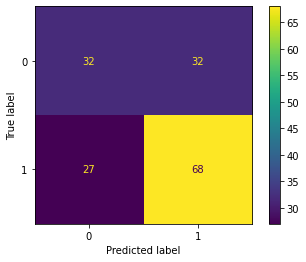

In [42]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

#Visualização da matriz de Confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=knn.classes_)

disp.plot()
plt.show()

### Percentual de acurácia do modelo

É estabelecido pela biblioteca sklearn com importação de uma ferramenta

In [43]:
# Teste de Acuracidade (accuracy)
print('Acuracidade (treino): ', knn.score( x_train, y_train ))
print('Acuracidade (teste): ', knn.score( x_test, y_test ))

Acuracidade (treino):  0.7468354430379747
Acuracidade (teste):  0.6289308176100629


# Naive Bayes

In [44]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

y_pred = gnb.fit(x_train, y_train).predict(x_test)
y_pred

array([0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0])

In [45]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.660377358490566

In [46]:
# Teste de Acuracidade (accuracy)
print('Acuracidade (treino): ', gnb.score( x_train, y_train ))
print('Acuracidade (teste): ', gnb.score( x_test, y_test ))

Acuracidade (treino):  0.6930379746835443
Acuracidade (teste):  0.660377358490566


# Decision Tree

In [47]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

baseCopy = baseinha1.dropna()

# iris = load_iris()
# X, y = iris.data, iris.target

xT, yT = baseCopy[['Genero', 'Salario Mês', 'Estado Civil', 'Idade']], baseCopy['Estado Civil'].values

clf = tree.DecisionTreeClassifier()
clf = clf.fit(xT, yT)


xTree_train, xTree_test, yTree_train, yTree_test = train_test_split(xT, yT, test_size=0.2, 
                                                    random_state=42)

model = DecisionTreeClassifier(criterion='entropy', random_state=42)
model.fit(xTree_train, yTree_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

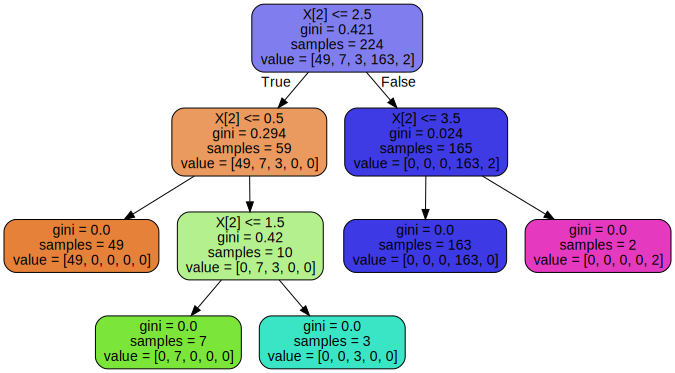

In [48]:
import graphviz

dot_data = tree.export_graphviz(clf, filled=True, rounded=True)

graph = graphviz.Source(dot_data)
graph

In [49]:
clf.score

<bound method ClassifierMixin.score of DecisionTreeClassifier()>

In [50]:
yTree_pred = model.predict(xTree_test)
yTree_pred

array([3, 3, 3, 0, 3, 3, 3, 3, 3, 0, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3,
       0, 3, 0, 3, 3, 0, 3, 0, 2, 0, 3, 3, 0, 1, 0, 3, 3, 3, 3, 3, 3, 3,
       3])

In [51]:
from sklearn.metrics import accuracy_score
accuracy_score(yTree_test, yTree_pred)

1.0

In [52]:
def accuracy(yt, yp):
    return (yp==yt).mean()

accuracy(yTree_test, yTree_pred)

1.0

In [53]:
# # Teste de Acuracidade (accuracy)
# print('Acuracidade (treino): ', clf.score( x_train, y_train ))
# print('Acuracidade (teste): ', clf.score( x_test, y_test ))

# SVM - Support Vector Machine

In [54]:
from sklearn import svm

svmClf = svm.SVC(kernel='linear', probability=True) # Linear Kernel
svmClf.fit(x_train, y_train)

y_pred = svmClf.predict(x_test)

In [55]:
from sklearn import metrics

In [56]:
accuracy_score(y_test, y_pred)

0.660377358490566

###Precision e Recall

In [57]:
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))

Precision:  0.735632183908046
Recall:  0.6736842105263158


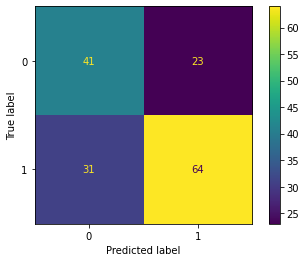

In [58]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = svmClf.predict(x_test)
y_prob = svmClf.predict_proba(x_test)

y_true = y_test
cm = confusion_matrix(y_true, y_pred)

#Visualização da matriz de Confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=svmClf.classes_)

disp.plot()
plt.show()